In [1]:
# check if python >= 3.5
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common import
import numpy as np
import os

# set random seed
np.random.seed(42)

# plot pretty figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save figure
project_root_dir = '.'
chapter_name = 'classification'
images_path = os.path.join(project_root_dir, 'images', chapter_name)
os.makedirs(images_path, exist_ok=True)

def save_fig(fig_id, 
             tight_layout=True, 
             fig_extension='png',
             fig_resolution=300
             ):
    
    fig_path = os.path.join(images_path, fig_id + '.' + fig_extension)
    
    print('saving figure', '\t:', fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fig_path, format=fig_extension, dpi=fig_resolution)

# MNIST

The MNIST dataset is a set of 70,000 handwritten digits. 


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist_feature_names = mnist['feature_names']

for i in range(10):
    print('feature', str(i+1), 'is', '\t:', mnist_feature_names[i])


feature 1 is 	: pixel1
feature 2 is 	: pixel2
feature 3 is 	: pixel3
feature 4 is 	: pixel4
feature 5 is 	: pixel5
feature 6 is 	: pixel6
feature 7 is 	: pixel7
feature 8 is 	: pixel8
feature 9 is 	: pixel9
feature 10 is 	: pixel10


In [4]:
mnist_descr = mnist['DESCR']
print(mnist_descr)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist_details = mnist['details']

cnt = 1
for key, value in mnist_details.items():
    print('key', str(cnt), '[', key, ']', 'is:\n', value, '\n')
    cnt +=1


key 1 [ id ] is:
 554 

key 2 [ name ] is:
 mnist_784 

key 3 [ version ] is:
 1 

key 4 [ format ] is:
 ARFF 

key 5 [ upload_date ] is:
 2014-09-29T03:28:38 

key 6 [ licence ] is:
 Public 

key 7 [ url ] is:
 https://www.openml.org/data/v1/download/52667/mnist_784.arff 

key 8 [ file_id ] is:
 52667 

key 9 [ default_target_attribute ] is:
 class 

key 10 [ tag ] is:
 ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'] 

key 11 [ visibility ] is:
 public 

key 12 [ status ] is:
 active 

key 13 [ processing_date ] is:
 2018-10-03 21:23:30 

key 14 [ md5_checksum ] is:
 0298d579eb1b86163de7723944c7e495 



In [6]:
mnist_categories = mnist['categories']
print('MNIST categories are:', mnist_categories)

MNIST categories are: {}


In [7]:
mnist_url = mnist['url']
print('MNIST url is:', mnist_url)

MNIST url is: https://www.openml.org/d/554


In [8]:
# read in the data & target
X, y = mnist['data'], mnist['target']
print('X shape', '\t:', X.shape)
print('y shape', '\t:', y.shape)

X shape 	: (70000, 784)
y shape 	: (70000,)


In [9]:
# print the raw data of one digit
import matplotlib as mpl
import matplotlib.pyplot as plt

# get the first row of data in 'data'
some_digit = X[0]

# reshape the row into a 2D array of 28 rows and 28 columns
some_digit_image = some_digit.reshape(28, 28)
print('the raw data in one row reshaped as a 2D-array of 28x28 is:', '\n\n', some_digit_image)

the raw data in one row reshaped as a 2D-array of 28x28 is: 

 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 

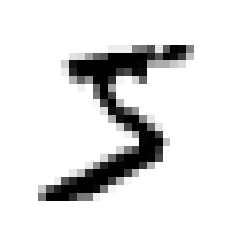

In [10]:
# plot one digit as image
plt.imshow(some_digit_image,
           cmap='binary')
plt.axis('off')
plt.show()

In [11]:
# print the target value corresponding to X[0]
print('data in y[0] is:')
print(y[0])
print('whose type is:', type(y[0]))

data in y[0] is:
5
whose type is: <class 'str'>


In [12]:
# cast y into integer
y = y.astype(np.uint8)
print('after casting, data in y[0] is:')
print(y[0])
print('whose type is:', type(y[0]))

after casting, data in y[0] is:
5
whose type is: <class 'numpy.uint8'>


saving figure 	: the_first_300_digits


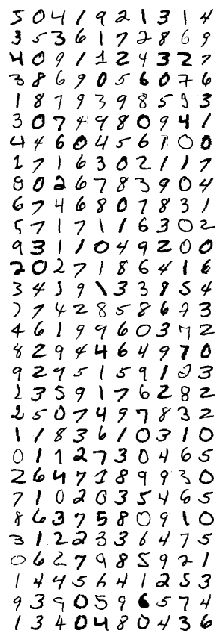

In [13]:
# function to plot digits
def plot_digits(instances, images_per_row=10, **options):
    image_size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(image_size, image_size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis=1))
    
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

# plot digits 
plt.figure(figsize=(9,9))

# get the first N rows (digits) from X
n_rows = 300
example_images = X[:n_rows]

plot_digits(example_images, images_per_row=10)
save_fig('the_first_' + str(n_rows) + '_digits')
plt.show()

In [14]:
# get the training and test data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print('X_train shape is:', '\t:', X_train.shape)
print('y_train shape is:', '\t:', y_train.shape)
print('X_test shape is:',  '\t:', X_test.shape)
print('y_test shape is:',  '\t:', y_test.shape)

X_train shape is: 	: (60000, 784)
y_train shape is: 	: (60000,)
X_test shape is: 	: (10000, 784)
y_test shape is: 	: (10000,)


the last digit in X_train is:

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  38.  48.  48. 

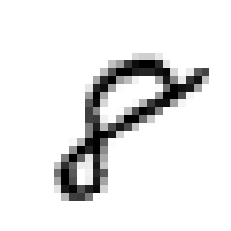

In [15]:
# print and plot the last digit in X_train
the_last_digit_in_X_train = X_train[-1]
the_last_digit_in_X_train_image = the_last_digit_in_X_train.reshape(28, 28)
print('the last digit in X_train is:\n')
print(the_last_digit_in_X_train_image)
plt.imshow(the_last_digit_in_X_train_image, cmap='binary')
plt.axis('off')
plt.show()

In [16]:
# print the last value in y_train
the_last_value_in_y_train = y_train[-1]
print('the last digit in y_train is', '\t:', the_last_value_in_y_train)

the last digit in y_train is 	: 8


# training a binary classifier

In [17]:
# create target vectors
y_train_5 = (y_train == 5) # true for all 5s, False for all other digits
y_test_5  = (y_test  == 5) 

num = 10
for i in range(num):
    print('item ', str(i), 'in y_train   is:', y_train[i])
    print('item ', str(i), 'in y_train_5 is:', y_train_5[i], '\n')

for i in range(num):
    print('item ', str(i), 'in y_test   is:', y_test[i])
    print('item ', str(i), 'in y_test_5 is:', y_test_5[i], '\n')   

item  0 in y_train   is: 5
item  0 in y_train_5 is: True 

item  1 in y_train   is: 0
item  1 in y_train_5 is: False 

item  2 in y_train   is: 4
item  2 in y_train_5 is: False 

item  3 in y_train   is: 1
item  3 in y_train_5 is: False 

item  4 in y_train   is: 9
item  4 in y_train_5 is: False 

item 5 in y_train   is: 2
item  5 in y_train_5 is: False 

item  6 in y_train   is: 1
item  6 in y_train_5 is: False 

item  7 in y_train   is: 3
item  7 in y_train_5 is: False 

item  8 in y_train   is: 1
item  8 in y_train_5 is: False 

item  9 in y_train   is: 4
item  9 in y_train_5 is: False 

item  0 in y_test   is: 7
item  0 in y_test_5 is: False 

item  1 in y_test   is: 2
item  1 in y_test_5 is: False

item  2 in y_test   is: 1
item  2 in y_test_5 is: False 

item  3 in y_test   is: 0
item  3 in y_test_5 is: False 

item  4 in y_test   is: 4
item  4 in y_test_5 is: False 

item  5 in y_test   is: 1
item  5 in y_test_5 is: False 

item  6 in y_test   is: 4
item  6 in y_test_5 is: False

In [18]:
# apply Stochastic Gradient Descent (SGD) classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
item_index = 0
some_digit = X[item_index]

print('the', str(item_index), 'item in the data set is:\t', y[item_index])
print('...predition on if it is 5 is:\t', sgd_clf.predict([some_digit]))

the 0 item in the data set is:	 5
...predition on if it is 5 is:	 [ True]


# performance measure
# measuring accuracy using cross-validation
# implementing cross-validation

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)

    y_pred = clone_clf.predict(X_test_fold)

    n_correct = sum(y_pred == y_test_fold)

    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [22]:
# a base estimator guessing "not-5"
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) 

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

# confusion matrix

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(y_train_pred[0], type(y_train_pred[0]))

True <class 'numpy.bool_'>


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [26]:
# test perfect prediction
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]])

# precision and recall

precision = TP / (TP + FP)

recall = TP / (TP + FN)

F1 = TP / (TP + (FP + FN)/2) _# harmonic mean of precision and recall_

In [27]:
from sklearn.metrics import precision_score, recall_score

print('precision score:\t', precision_score(y_train_5, y_train_pred))
print('recall score:   \t', recall_score(y_train_5, y_train_pred))

precision score:	 0.8370879772350012
recall score:   	 0.6511713705958311


In [28]:
from sklearn.metrics import f1_score

print('f1 score:\t\t', f1_score(y_train_5, y_train_pred))
f1_score_manual = 3530 / (3530 + (687 + 1891)/2)
print('f1 score (manual):\t', f1_score_manual)

f1 score:		 0.7325171197343846
f1 score (manual):	 0.7325171197343847


# precision/recall trade-off

In [29]:
item_index = 0
some_digit = X[item_index]
y_scores = sgd_clf.decision_function([some_digit])
print('y_scores is:\t', y_scores[0])

y_scores is:	 2164.2203023926586


In [30]:
threshold = 0
is_y_scores_larger_than_threshold = (y_scores > threshold)
print('is y_scores', y_scores[0], '> threshold', threshold, 
      '?:\t', is_y_scores_larger_than_threshold)

is y_scores 2164.2203023926586 > threshold 0 ?:	 [ True]


In [31]:
threshold = 8000
is_y_scores_larger_than_threshold = (y_scores > threshold)
print('is y_scores', y_scores[0], '> threshold', threshold, 
      '?:\t', is_y_scores_larger_than_threshold)

is y_scores 2164.2203023926586 > threshold 8000 ?:	 [False]


### how to decide which threshold to use? 
- first, use **_cross_val_predict()_** to get the scores of all instances in the training set, 
- but specify the method as **_decision_function_** to return **_decision scores_** rather than predictions.
- with all the decision scores, use **_precision_recall_curve()_** to compute precision and recall for all possible thresholds.
- Finally, use **_Matplotlib_** to plot precision and recall as functions of the threshold value 

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, 
                             cv=3, method='decision_function')

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

saving figure 	: precision_recall_vs_threshold_plot


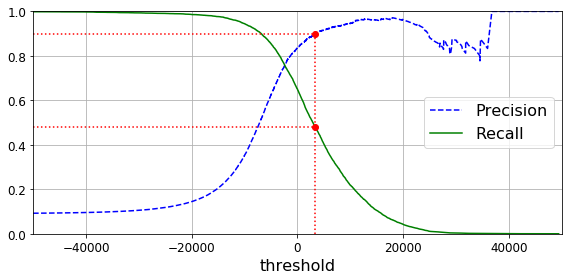

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel('threshold', fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([3370, 3370], [0.0, 0.9], 'r:')
plt.plot([-50000, 3370], [0.9, 0.9], 'r:')
plt.plot([-50000, 3370], [0.48, 0.48], 'r:')
plt.plot([3370], [0.9], 'ro')
plt.plot([3370], [0.48], 'ro')
save_fig('precision_recall_vs_threshold_plot')
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

saving figure 	: precision_vs_recall_plot


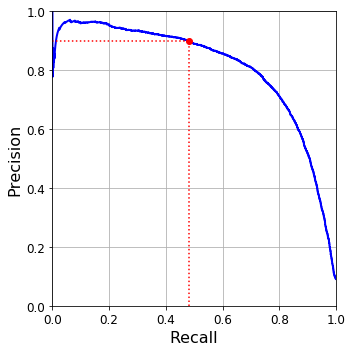

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(5, 5))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.48, 0.48], [0., 0.9], 'r:')
plt.plot([0., 0.48], [0.9, 0.9], 'r:')
plt.plot([0.48], [0.9], 'ro')
save_fig('precision_vs_recall_plot')
plt.show()


### get the lowest threshold value that provides a min precision

In [37]:
min_precision = 0.9
threshold_for_min_precision = thresholds[np.argmax(precisions >= min_precision)]
print('threshold providing at least', str(min_precision*100)+'% precision is:', threshold_for_min_precision)

threshold providing at least 90.0% precision is: 3370.0194991439557


In [38]:
y_train_pred_90 = (y_scores >= threshold_for_min_precision)
print(y_train_pred_90)

[False False False ...  True False False]


In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# ROC curve

* **_ROC curve_** plots **_ture positive rate (recall)_** against **_false positive rate (FPR)_**

* The **_false positive rate (FPR)_** (specificity) = 1 - **_true negative rate(TNR)_**

    | Name 1                          | Name 2      | Calculation    |
    | ------------------------------- | ----------- |--------------- |
    | **_ture positive rate (TPR)_**  | recall      | TP / (TP + FN) |
    | **_false positive rate (FPR)_** | specificity | FP / (TN + FP) |
    | **_true negative rate (TNR)_**  |             | TN / (TN + FP) |

* there is a trade-off btw recall (TPR) and specificity (FPR).

* the ROC curve of a good classifier tends bend towards the top left corner.

* area-under-curve (AUC) for ROC curve is an indicator to compare classifiers.

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

saving figure 	: roc_curve_plot


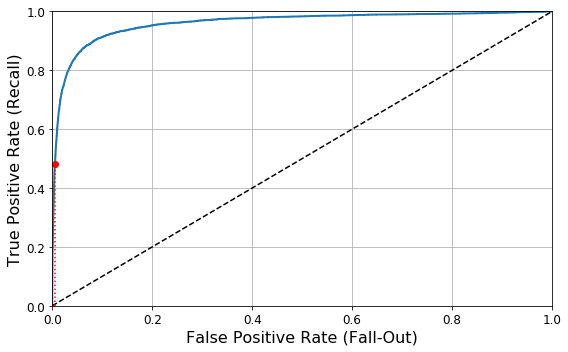

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 5))
plot_roc_curve(fpr, tpr)
plt.plot([4.8e-3, 4.8e-3], [0, 0.48], 'r:')
plt.plot([0.0, 4.8e-3], [0.48, 0.48], 'r:')
plt.plot([4.8e-3], [0.48], 'ro')
save_fig('roc_curve_plot')
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## train a RandomForestClassifier to compare with SGDClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method='predict_proba')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

saving figure 	: roc_curve_comparison_plot


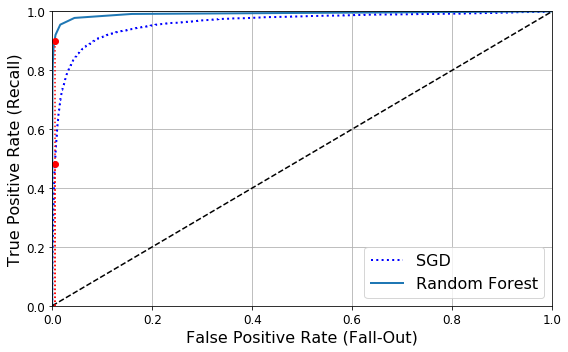

In [46]:
plt.figure(figsize=[8, 5])
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.plot([4.8e-3, 4.8e-3], [0, 0.48], 'r:')
plt.plot([0.0, 4.8e-3], [0.48, 0.48], 'r:')
plt.plot([4.8e-3], [0.48], 'ro')
plt.plot([4.8e-3, 4.8e-3], [0, 0.9], 'r:')
plt.plot([4.8e-3], [0.9], 'ro')
plt.grid(True)
plt.legend(loc='lower right', fontsize=16)
save_fig('roc_curve_comparison_plot')
plt.show()

In [47]:
auc_RandomForest = roc_auc_score(y_train_5, y_scores_forest)
print('AUC of RandomForest classifer is:', auc_RandomForest)

AUC of RandomForest classifer is: 0.9920527492698306


In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score = precision_score(y_train_5, y_train_pred_forest)
recall_score = recall_score(y_train_5, y_train_pred_forest)

print('precision score:\t', precision_score)
print('recall score:   \t', recall_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
precision score:	 0.986046511627907
recall score:   	 0.8212506917542889


# Multiclass Classification

* SGD, Random Forest and naive Bayes classifiers can handle multiclass Classification

* Logistic Regression and SVM are binary classifiers.

* one-vesus-the-rest (OvR): one classifier for each class

* one-vesus_one (OvO): one classifier for each pair fo classes [N*(N-1)/2]

* apply a SVM classifer to the training set with all the digits, not just 5.

* Scikit-Learn detects that a binary classifier (SVM) is applied for multiclass classification (because y_train contains more than one class). 

* So, OvO strategies is applied, i.e., it trains 45 binary classifiers, get the decision scores for the image, and select the class with the highest score.


In [49]:
from sklearn.svm import SVC

item_index = 0
some_digit = X[item_index]

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

* use the **_decision_function()_** to get the decision scores for each class

In [50]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

* use **_np.argmax()_** function to get the indice of the max value in the array

In [51]:
np.argmax(some_digit_scores)

5

* use **_.classes\_ _** method of the classifier to get the classes as identified

In [52]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [53]:
svm_clf.classes_[5]

5

* force Scikit-Learn to use OvO or OvA

In [55]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)